In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car_price_prediction.csv')

## EDA

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
data.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


In [8]:
data.duplicated().sum()

313

In [9]:
data[data.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(18924, 18)

In [13]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [14]:
## Show the number of unique values for each column
for col in data.columns:
    print(col, ':', data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


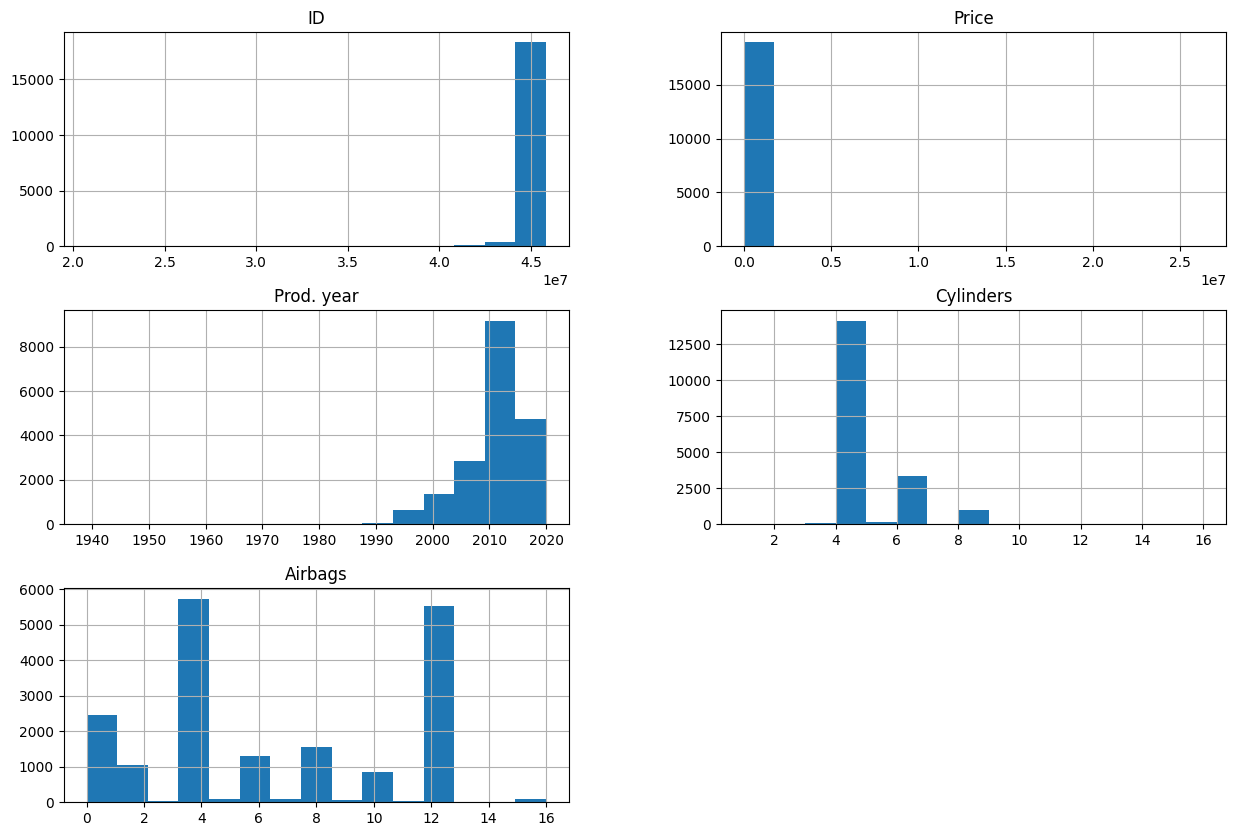

In [15]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

In [16]:
top_10_cars = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

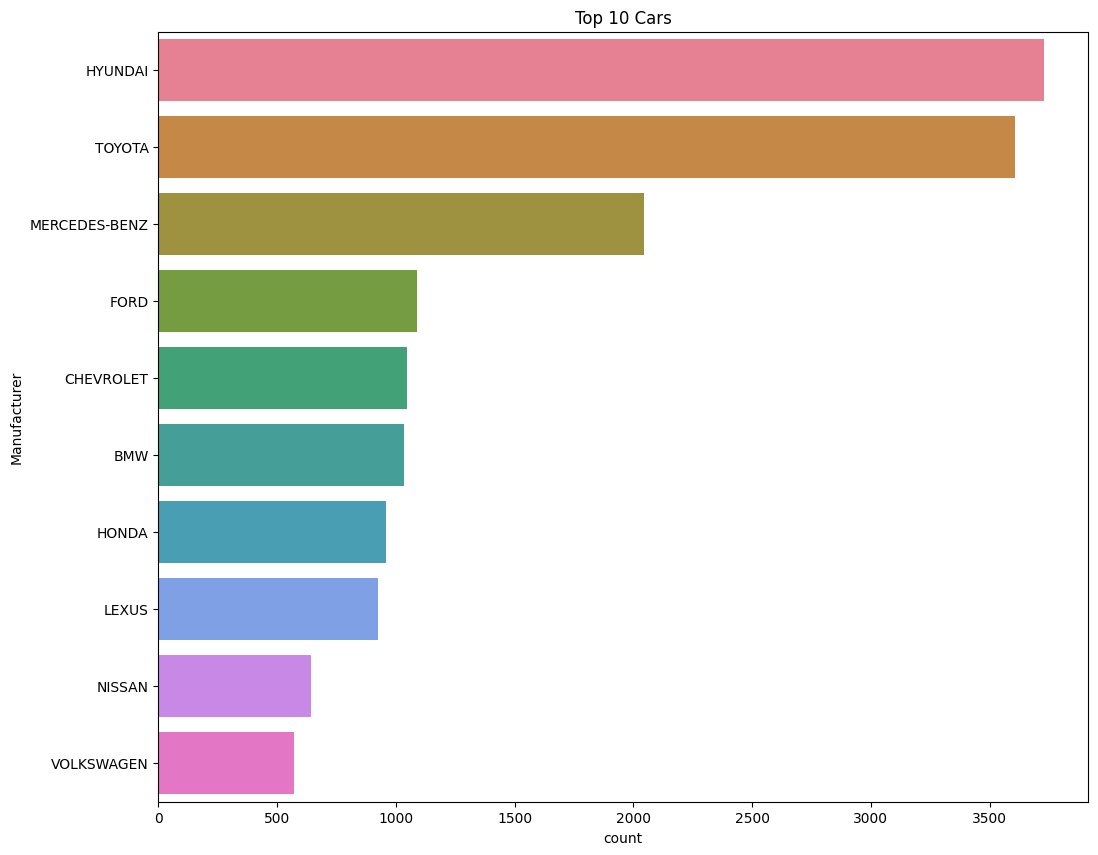

In [17]:
plt.figure(figsize=(12, 10))
plt.title('Top 10 Cars')
sns.barplot(top_10_cars, orient='h', palette='husl')
plt.show()

In [18]:
# Mean Prices of Top 10 cars
top_10_mean_prices = [data[data['Manufacturer'] == i]['Price'].mean() for i in list(top_10_cars.index)]
top_10_mean_prices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

<BarContainer object of 10 artists>

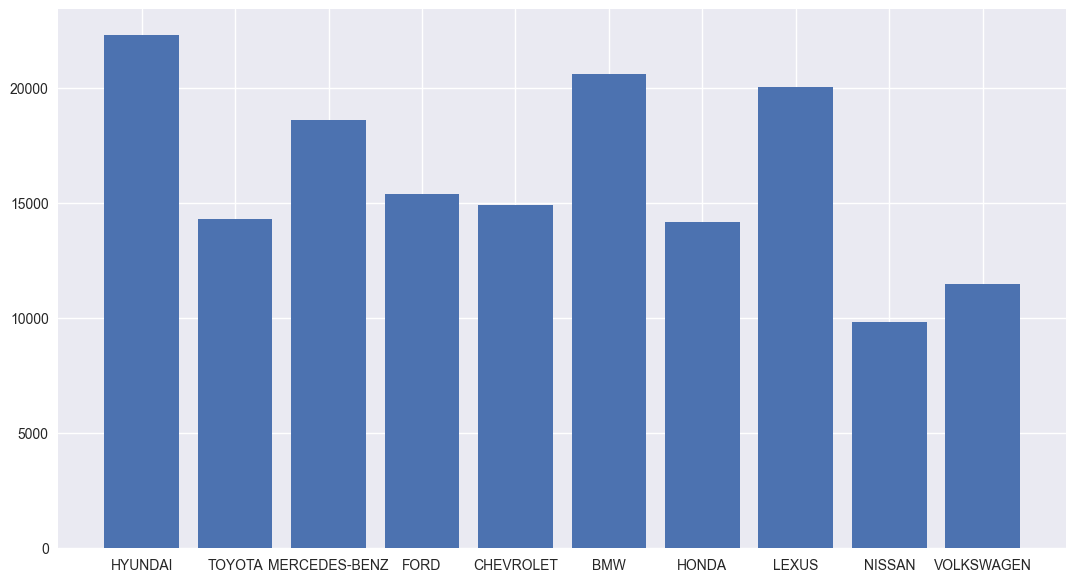

In [19]:
plt.figure(figsize=(13, 7))
plt.style.use('seaborn-v0_8')
plt.bar(top_10_cars.index, top_10_mean_prices)

In [20]:
data_corr = data.corr(numeric_only=True)
data_corr

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


<Axes: >

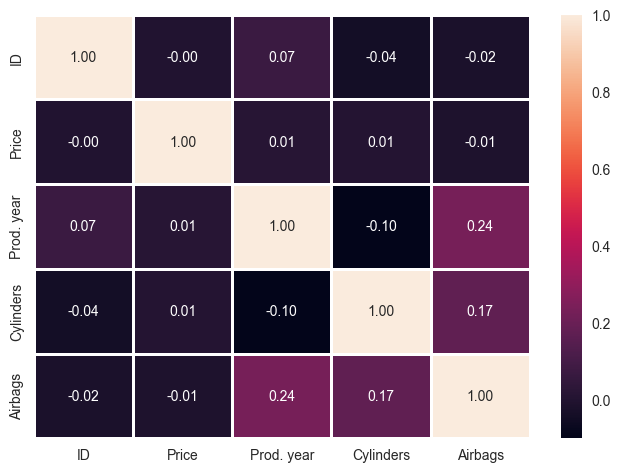

In [21]:
sns.heatmap(data_corr, annot=True, fmt='.2f', lw=2)

In [22]:
categorical_cols = data.select_dtypes(include='object')
categorical_cols

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


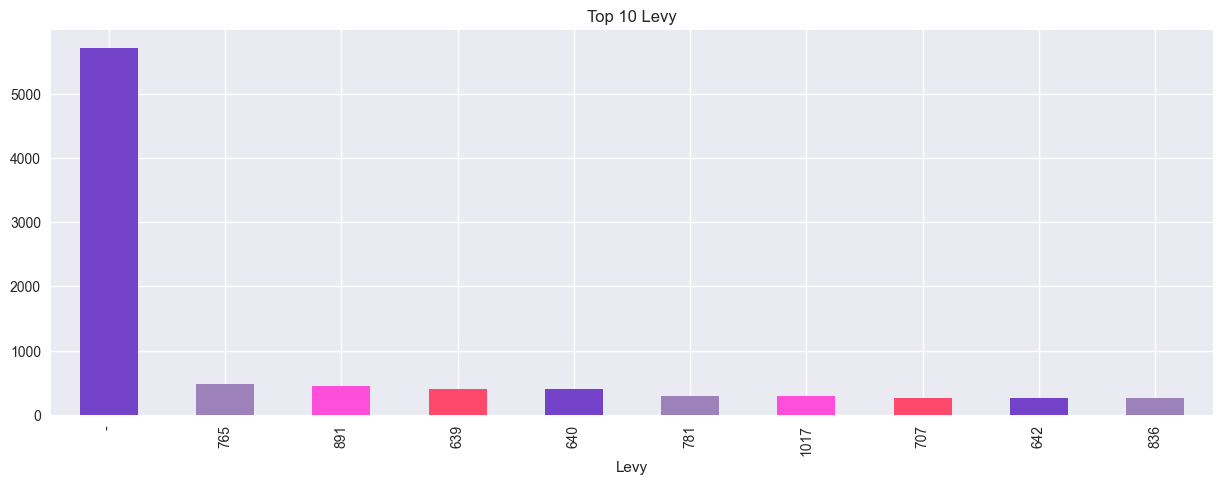

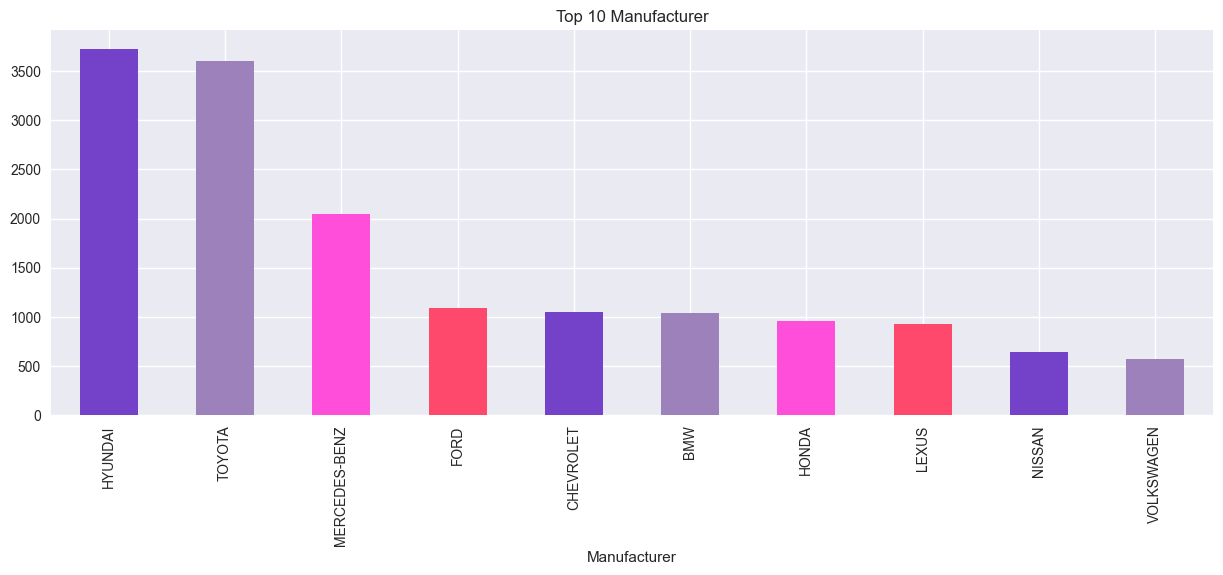

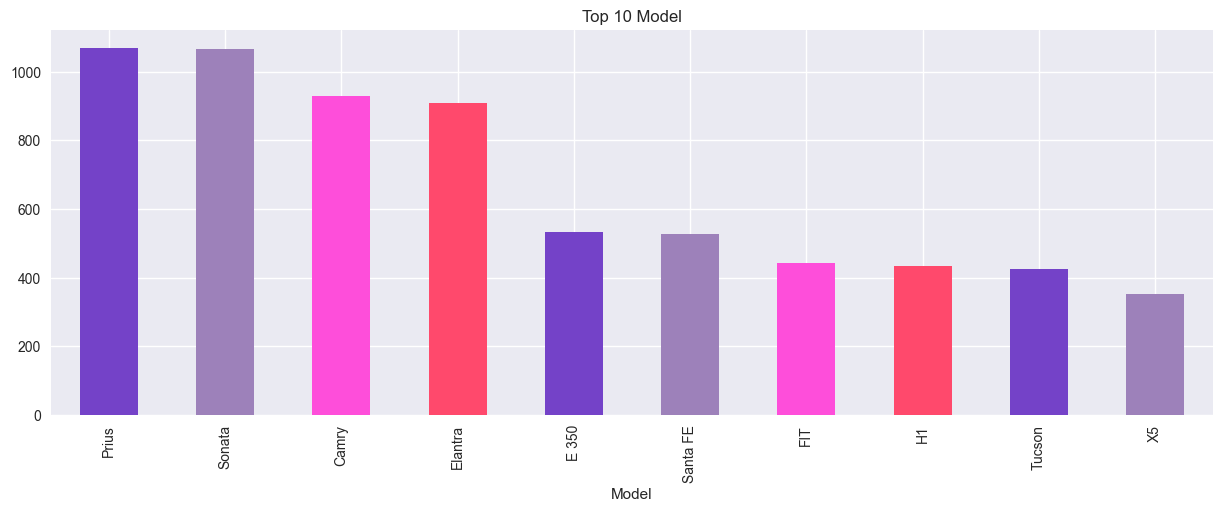

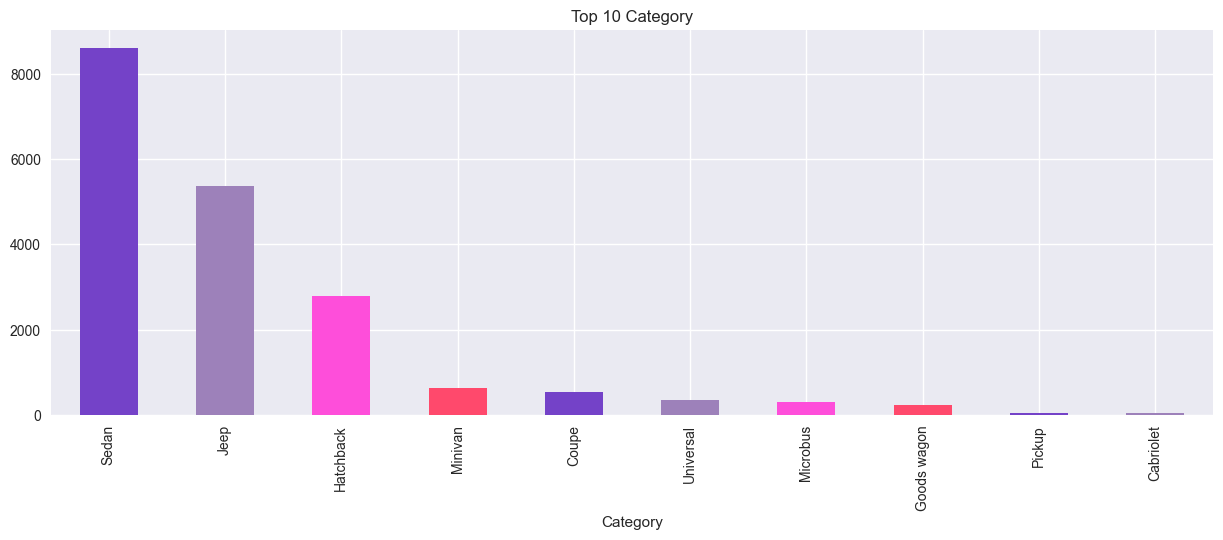

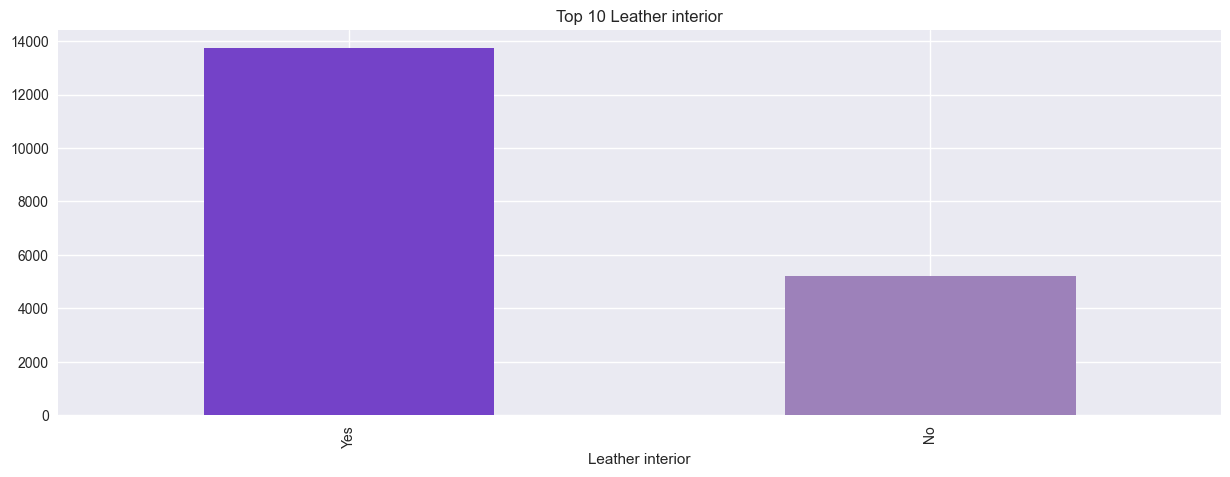

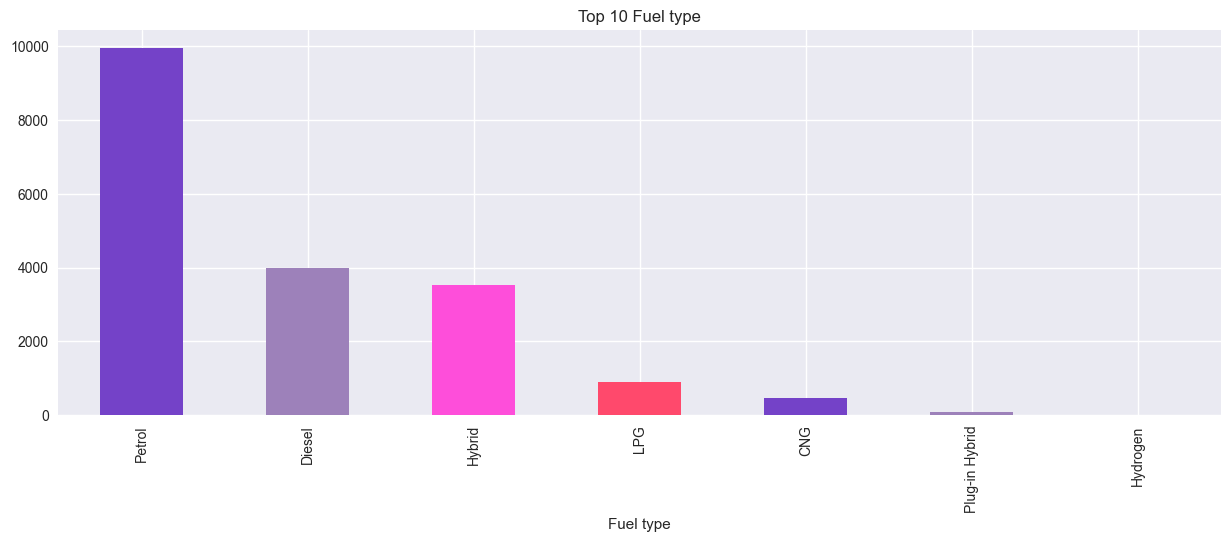

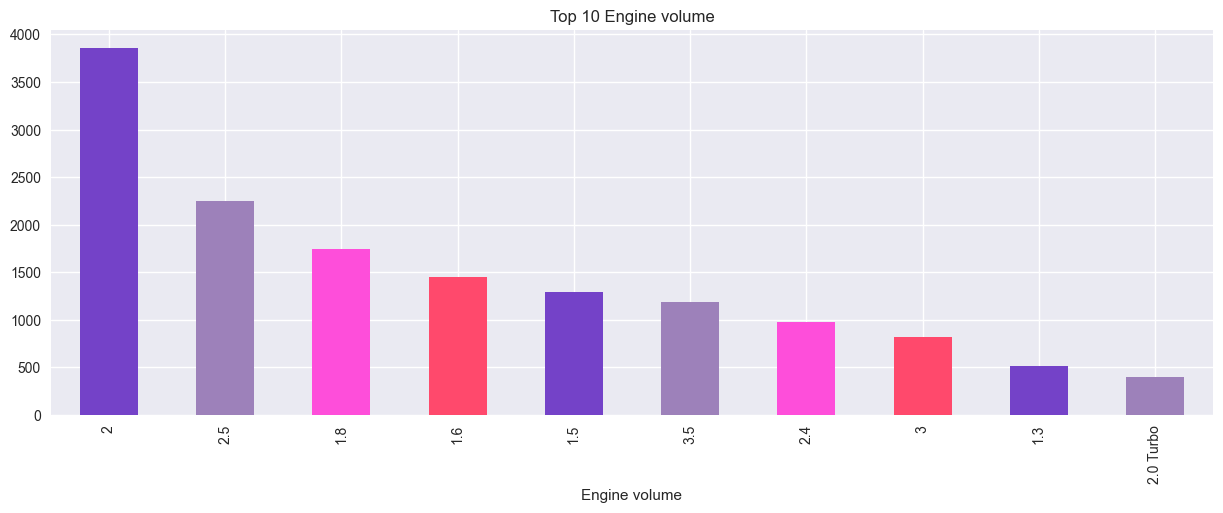

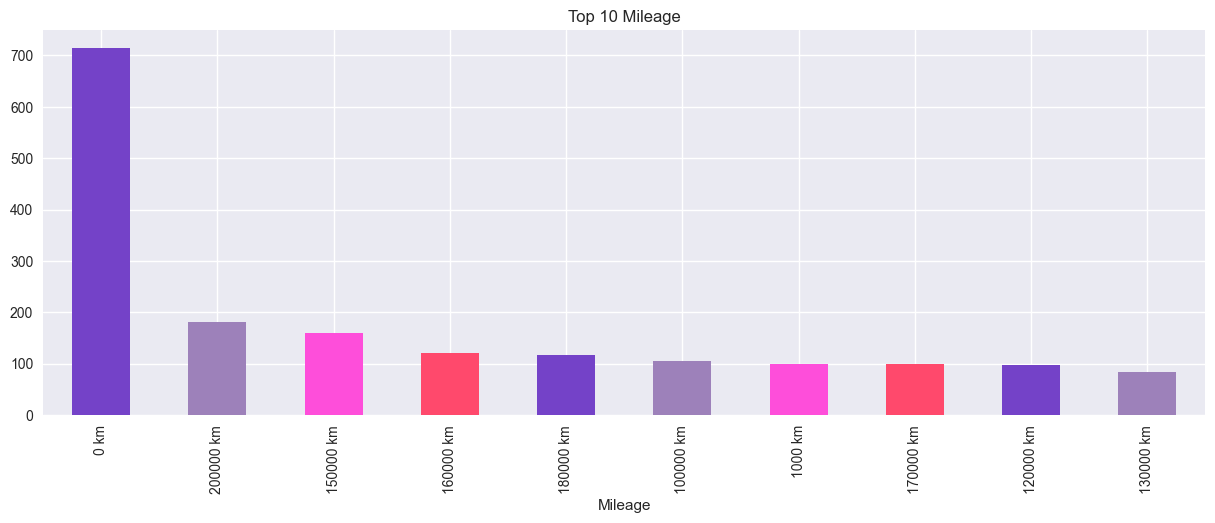

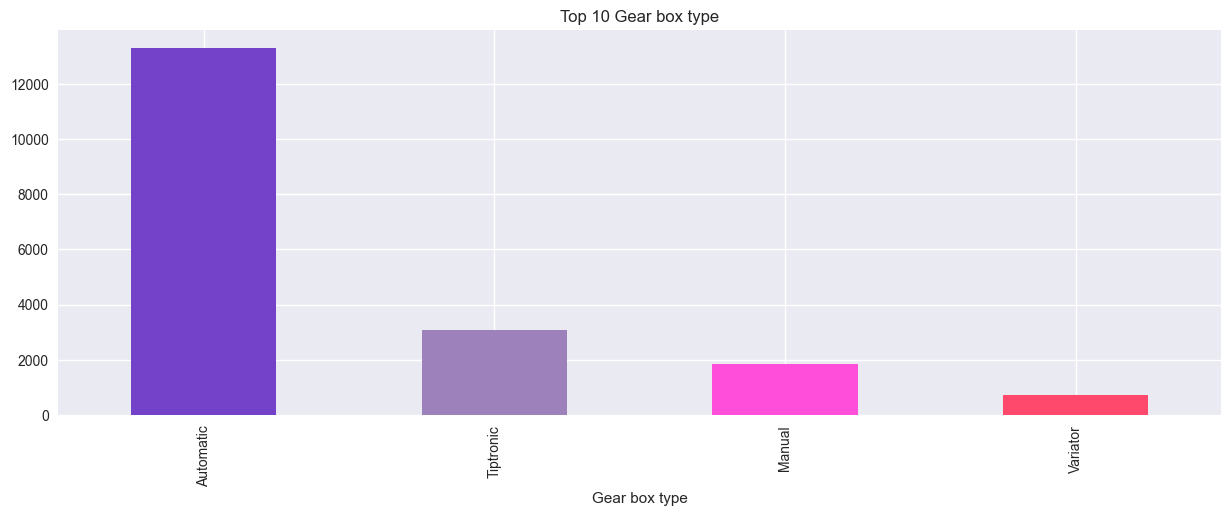

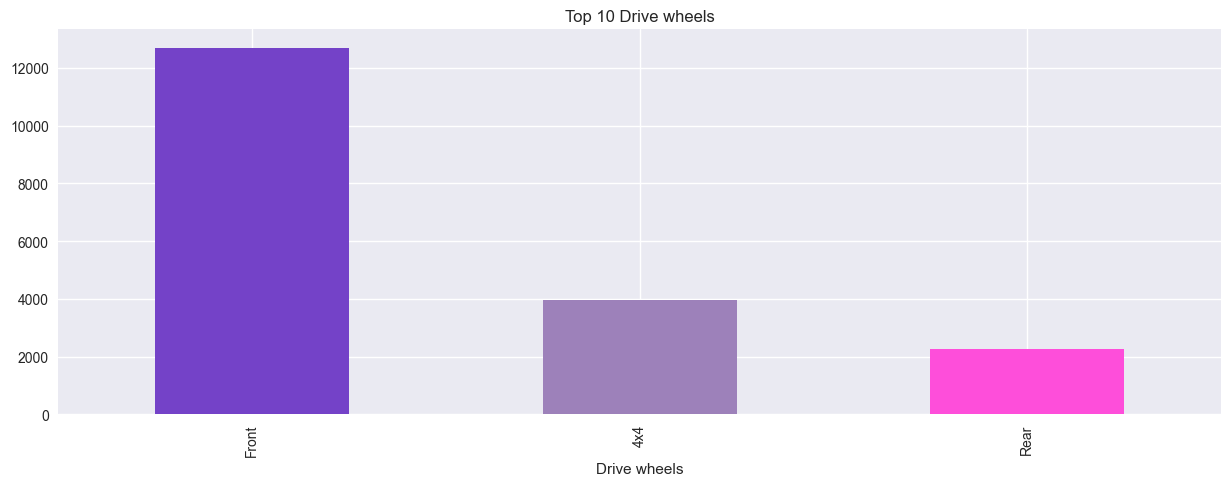

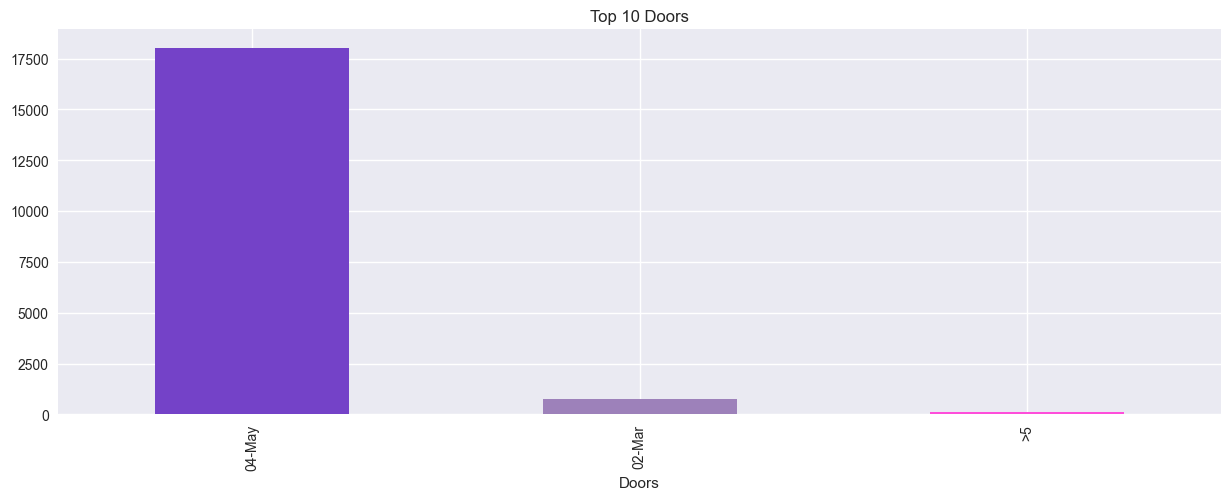

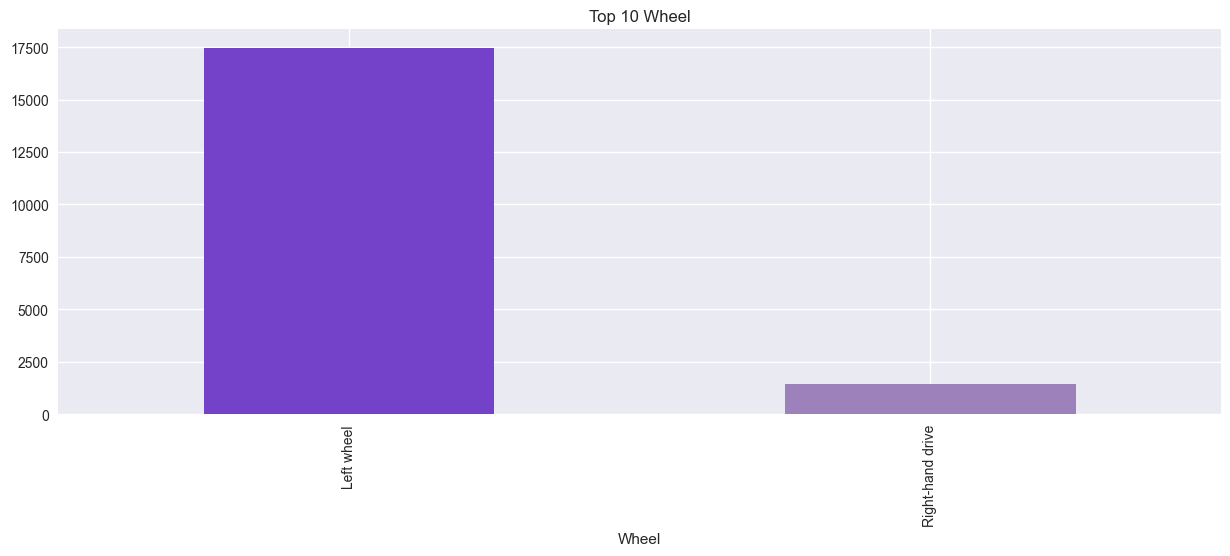

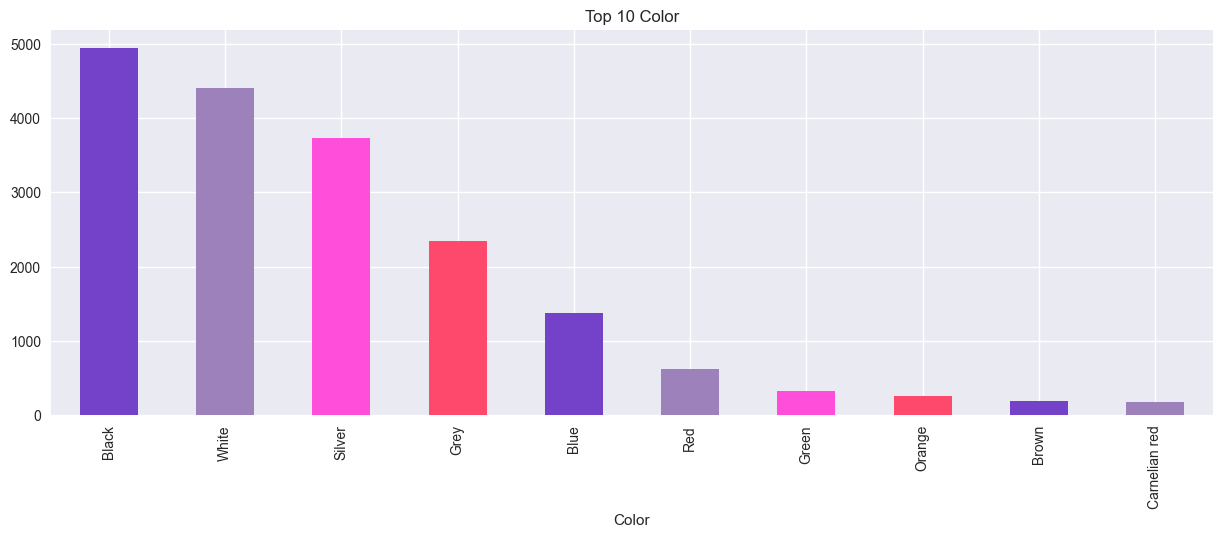

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    top_10 = data[col].value_counts()[:10]
    top_10.plot(kind='bar', color=['#7442C8', '#9D81BA', '#FE4EDA', '#FF496C'])
    plt.title(f'Top 10 {col}')
    # plt.xlabel()
    # plt.ylabel()
    plt.show()

## Data Preprocessing

In [24]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [25]:
data = data.drop(['ID', 'Doors'], axis=1)

In [26]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


## Working With Dates

In [27]:
from datetime import datetime as dt

In [28]:
current_year = dt.today().year
current_year

2025

In [29]:
data['Car_Age'] = current_year - data['Prod. year']

In [30]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car_Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11


In [31]:
data.drop(['Prod. year'], axis = 1, inplace=True)

In [32]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11


##  Working with Levy column

In [33]:
data['Levy'].replace('-', '0', inplace=True)
data['Levy'] = data['Levy'].astype(int)

In [34]:
data['Levy'].dtype

dtype('int32')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Car_Age           18924 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(11)

In [36]:
data['Levy'].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

## Working with Mileage column

In [37]:
data['Mileage'] = data['Mileage'].str.replace('km', '').str.strip()

In [38]:
data['Mileage'].value_counts().unique()

array([714, 181, 159, 120, 117, 105, 100,  99,  98,  84,  81,  73,  71,
        67,  63,  62,  61,  59,  55,  53,  52,  51,  47,  46,  43,  42,
        40,  39,  38,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,
        26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,
        13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [39]:
data['Mileage'] = data['Mileage'].astype(int)

In [40]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


## Working with Engine Volume column

In [41]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [42]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')

In [43]:
data['Engine volume'] = data['Engine volume'].astype(float)

In [44]:
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int32  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Car_Age           18924 non-null  int64  
dtypes: float64(2), int32(2), int64(3), object(9)


## Outliers Detection

In [46]:
numerical_data = data.select_dtypes(exclude= 'object')
numerical_data

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car_Age
0,13328,1399,3.5,186005,6.0,12,15
1,16621,1018,3.0,192000,6.0,8,14
2,8467,0,1.3,200000,4.0,2,19
3,3607,862,2.5,168966,4.0,0,14
4,11726,446,1.3,91901,4.0,4,11
...,...,...,...,...,...,...,...
19232,8467,0,2.0,300000,4.0,5,26
19233,15681,831,2.4,161600,4.0,8,14
19234,26108,836,2.0,116365,4.0,4,15
19235,5331,1288,2.0,51258,4.0,4,18


In [47]:
for col in numerical_data:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outliers = ( (numerical_data[col] > high) | (numerical_data[col] < low) ).sum()
    total_rows = numerical_data[col].shape[0]
    print(f"Total outliers in {col} are: {outliers} --> {round((outliers) * 100/total_rows ,2)}%")
    if outliers > 0:
        new_data = data.loc[ (data[col] <= high) & (data[col] >= low)]

Total outliers in Price are: 1055 --> 5.57%
Total outliers in Levy are: 160 --> 0.85%
Total outliers in Engine volume are: 1358 --> 7.18%
Total outliers in Mileage are: 635 --> 3.36%
Total outliers in Cylinders are: 4765 --> 25.18%
Total outliers in Airbags are: 0 --> 0.0%
Total outliers in Car_Age are: 962 --> 5.08%


In [48]:
new_data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,Left wheel,Grey,12,12
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8,14
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4,15
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4,18


## Data Transformation

In [49]:
categorical_data = new_data.select_dtypes(include='object')
numerical_data = new_data.select_dtypes(exclude='object')

In [50]:
le = LabelEncoder()

In [51]:
for i in range(0, categorical_data.shape[1]):
    categorical_data.iloc[:, i] = le.fit_transform(categorical_data.iloc[:, i])

In [52]:
new_data = pd.concat([categorical_data, numerical_data], axis=1)

In [53]:
new_data

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car_Age
0,32,1136,4,1,2,0,0,0,12,13328,1399,3.5,186005,6.0,12,15
1,8,586,4,0,5,2,0,0,1,16621,1018,3.0,192000,6.0,8,14
2,21,610,3,0,5,3,1,1,1,8467,0,1.3,200000,4.0,2,19
3,16,589,4,1,2,0,0,0,14,3607,862,2.5,168966,4.0,0,14
4,21,610,3,1,5,0,1,0,12,11726,446,1.3,91901,4.0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,36,530,9,1,1,0,2,0,7,5802,1055,3.5,107800,6.0,12,12
19233,23,1213,9,1,5,2,1,0,11,15681,831,2.4,161600,4.0,8,14
19234,23,1312,4,1,1,0,1,0,7,26108,836,2.0,116365,4.0,4,15
19235,8,396,4,1,1,0,1,0,1,5331,1288,2.0,51258,4.0,4,18


In [54]:
new_data['Manufacturer'] = new_data['Manufacturer'].astype(int)
new_data['Model'] = new_data['Model'].astype(int)
new_data['Category'] = new_data['Category'].astype(int)
new_data['Leather interior'] = new_data['Leather interior'].astype(int)
new_data['Fuel type'] = new_data['Fuel type'].astype(int)
new_data['Gear box type'] = new_data['Gear box type'].astype(int)
new_data['Drive wheels'] = new_data['Drive wheels'].astype(int)
new_data['Wheel'] = new_data['Wheel'].astype(int)
new_data['Color'] = new_data['Color'].astype(int)

In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17962 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      17962 non-null  int32  
 1   Model             17962 non-null  int32  
 2   Category          17962 non-null  int32  
 3   Leather interior  17962 non-null  int32  
 4   Fuel type         17962 non-null  int32  
 5   Gear box type     17962 non-null  int32  
 6   Drive wheels      17962 non-null  int32  
 7   Wheel             17962 non-null  int32  
 8   Color             17962 non-null  int32  
 9   Price             17962 non-null  int64  
 10  Levy              17962 non-null  int32  
 11  Engine volume     17962 non-null  float64
 12  Mileage           17962 non-null  int32  
 13  Cylinders         17962 non-null  float64
 14  Airbags           17962 non-null  int64  
 15  Car_Age           17962 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memory usa

## Model Creation

In [56]:
x = new_data.drop('Price', axis = 1)
y = new_data['Price']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [58]:
algorithms = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'SVR']
r2_scores = []
rmse_scores = []

In [59]:
def model_prediction(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test, pre)
    r2_scores.append(r2)
    rmse =np.sqrt(mean_squared_error(y_test, pre))
    rmse_scores.append(rmse)
    score = model.score(x_test, y_test)
    print(f"The model score is: {score}")

In [60]:
lg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xg = XGBRegressor()
svr = SVR()

In [61]:
model_prediction(lg)

The model score is: 0.22287617776538615


In [62]:
model_prediction(dt)

The model score is: 0.40623813081249793


In [63]:
model_prediction(rf)

The model score is: 0.7635094720453258


In [64]:
model_prediction(xg)

The model score is: 0.7181388139724731


In [65]:
model_prediction(gb)

The model score is: 0.5652710187614041


In [66]:
model_prediction(svr)

The model score is: -0.04344177537748184


In [67]:
df = pd.DataFrame({'Algorithm': algorithms, 'R2_Score': r2_scores, 'RMSE_Score': rmse_scores})
df

,Algorithm,R2_Score,RMSE_Score
0,LinearRegression,0.222876,14958.526324
1,DecisionTreeRegressor,0.406238,13075.245475
2,RandomForestRegressor,0.763509,8251.835740
3,GradientBoostingRegressor,0.718139,9008.683359
4,XGBRegressor,0.565271,11188.013859
5,SVR,-0.043442,17333.162519


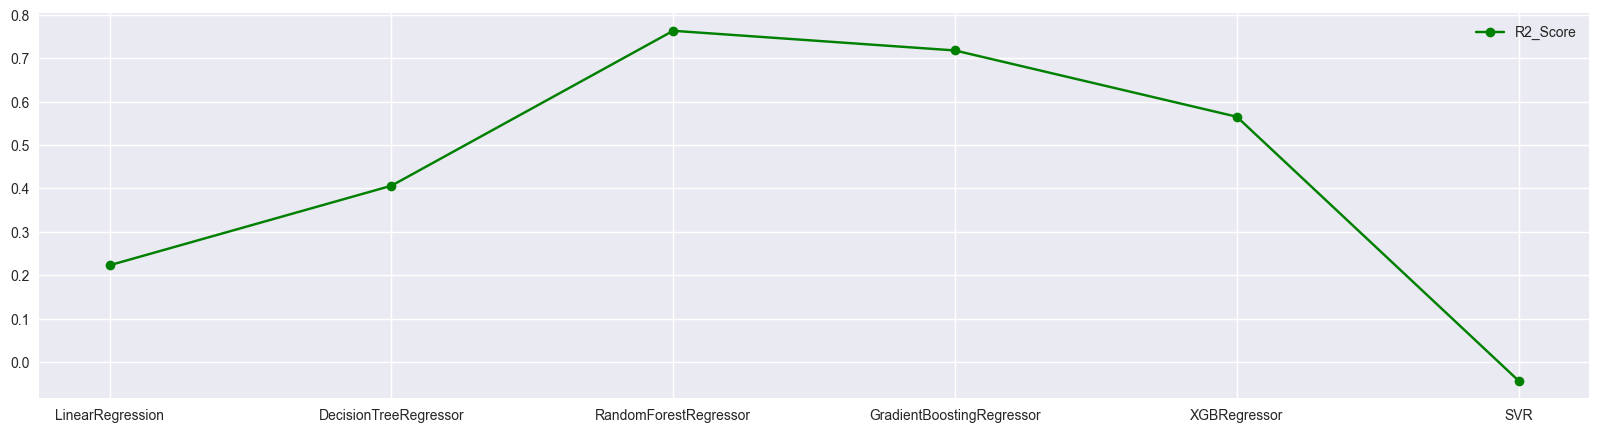

In [68]:
fig, sx = plt.subplots(figsize=(20, 5))
plt.plot(df.Algorithm, df.R2_Score, label = "R2_Score", marker='o', color='green')
plt.legend()
plt.show()

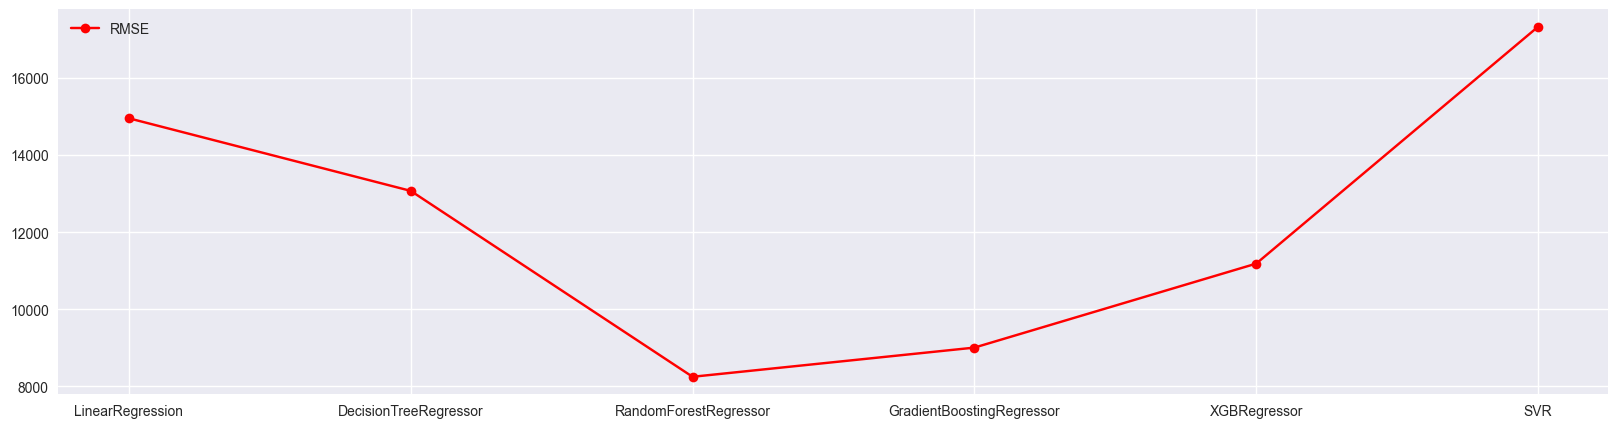

In [69]:
fig, sx = plt.subplots(figsize=(20, 5))
plt.plot(df.Algorithm, df.RMSE_Score, label = "RMSE", marker='o', color='red')
plt.legend()
plt.show()

## Using My Model For Predicting New Data

In [70]:
import pickle

In [71]:
file_name = 'Car_predictions.sav'

In [72]:
pickle.dump(rf, open(file_name, 'wb'))

In [73]:
new_data.Cylinders.unique()

array([ 6.,  4.,  8.,  1., 12.,  3., 16.,  2.,  5., 10.,  7., 14.])

In [74]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car_Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


In [75]:
data['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int32

In [76]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Car_Age'],
      dtype='object')